In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pvlib import temperature

# Faiman rad

### Importing dataframe

In [20]:
#readcsv
df = pd.read_csv("df_hourly")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [21]:
#readcsv
df_era5 = pd.read_csv("strd_era5_IFE.csv")  #Data from era5 for downwelling 

if not isinstance(df_era5["valid_time"], pd.DatetimeIndex):
        df_era5["valid_time"] = pd.to_datetime(df_era5["valid_time"])
df_era5.set_index("valid_time", inplace=True)

df_era5 = df_era5.tz_localize('UTC', ambiguous=False, nonexistent='NaT') #Era5 is UTC 
df_era5.index = df_era5.index - pd.Timedelta(hours=1)  #Subtracting one hour from era5 timestamps because era5 is right-bound and the dataframe we have is left-bound. 

df = df.join(df_era5, how='inner')

df["era5"] = df_era5["strd"]

### Plotting function for comparison

In [22]:
"""import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, module_name):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 5), gridspec_kw={'height_ratios': [1.9, 1]}, sharex=True)
    ax1.plot(x, temp_model, label="Estimated module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("Temperature [°C]", fontsize=12)
    ax1.tick_params(which="both", direction='in')
    
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]", fontsize=12)
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend(fontsize=12)
    
    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
    plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")

    ax2.tick_params(axis='x', which='major', pad=20, direction="in")
    ax2.tick_params(axis='x', which='minor', pad=5, labelsize=10, labelcolor="gray", direction="in", labelrotation=0)

    plt.tight_layout()
    plt.show()"""

'import matplotlib.dates as mdates\n\ndef plot_comparison(x, temp_model, temp_measured, module_name):\n    if not isinstance(x, pd.DatetimeIndex):\n        x = pd.to_datetime(x)\n    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 5), gridspec_kw={\'height_ratios\': [1.9, 1]}, sharex=True)\n    ax1.plot(x, temp_model, label="Estimated module temperature")\n    ax1.plot(x, temp_measured, label="Measured module temperature")\n    ax1.set_ylabel("Temperature [°C]", fontsize=12)\n    ax1.tick_params(which="both", direction=\'in\')\n    \n    ax2.plot(x, temp_model-temp_measured)\n    ax2.set_ylabel("Residuals [°C]", fontsize=12)\n    ax2.axhline(0, c="grey", linestyle=":")\n    ax1.legend(fontsize=12)\n    \n    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))\n    ax2.xaxis.set_major_formatter(mdates.DateFormatter(\'%Y-%m-%d\'))\n\n    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours\n    ax2.xaxis.set_minor_f

### Calculating and saving values for comparison

In [23]:
module_names = ["PT JKM325 nr 3", "PT JKM335 nr 3", "PT SunP nr 2", "PT REC nr 3", "PT Talesun FrLess 1",  "PT Talesun 3"]

In [85]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_models, temp_measured, save_as):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)

    models = ["Fuentes", "SAPM", "Faiman", "Faiman rad","Pvsyst", "Ross"]
    colors = ["b", "r", "hotpink", "orange", "green", "purple"]

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [1.9, 1]}, sharex=True)
    ax1.plot(x, temp_measured, label="Measured module temperature", color="black", linestyle="--")
    for i in range(len(temp_models)):
        ax1.plot(x, temp_models[i], label=models[i]+" estimate", color=colors[i])
    ax1.set_ylabel("Temperature [°C]", fontsize=12)
    ax1.tick_params(which="both", direction='in')
    for i in range(len(temp_models)):
        ax2.plot(x, temp_models[i]-temp_measured, color=colors[i])
    ax2.set_ylabel("Residuals [°C]", fontsize=12)
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend(fontsize=12)
    
    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
    plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")

    ax2.tick_params(axis='x', which='major', pad=20, direction="in")
    ax2.tick_params(axis='x', which='minor', pad=5, labelsize=10, labelcolor="gray", direction="in", labelrotation=0)

    plt.tight_layout()
    plt.savefig("img/all_models/"+save_as, bbox_inches='tight')
    plt.show()

In [72]:
temp_faimanrad1 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faimanrad2 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faimanrad3 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faimanrad4 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faimanrad5 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faimanrad6 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)

In [73]:
temp_fuentes1 = temperature.fuentes(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.665, wind_height=4, surface_tilt=45, module_width=1.002, module_length=1.665)
temp_fuentes2 = temperature.fuentes(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.684, wind_height=4, surface_tilt=45, module_width=1.002, module_length=1.684)
temp_fuentes3 = temperature.fuentes(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=45, module_height=0.725+0.3536*1.690, wind_height=4, surface_tilt=45, module_width=1.046, module_length=1.690)
temp_fuentes4 = temperature.fuentes(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=44, module_height=0.725+0.3536*1.721, wind_height=4, surface_tilt=45, module_width=1.016, module_length=1.721)
temp_fuentes5 = temperature.fuentes(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=43, module_height=0.725+0.3536*1.645, wind_height=4, surface_tilt=45, module_width=1.005, module_length=1.645)
temp_fuentes6 = temperature.fuentes(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], noct_installed=43, module_height=0.725+0.3536*1.715, wind_height=4, surface_tilt=45, module_width=1.045, module_length=1.715)

In [74]:
#glass/glass: open rack   a=-3.47   b=-0.0594  
temp_sapm_cell = temperature.sapm_module(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], -3.47, -0.0594)
#glass/polymer: open rack   a=-3.56   b=-0.075  
temp_sapm_cell2 = temperature.sapm_module(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], -3.56, -0.075)
#glass/polymer: open rack   a=-3.56   b=-0.075  
temp_sapm_cell3 = temperature.sapm_module(df["Irradiance (IRR Plan - SunP) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], -3.56, -0.075)

temp_sapm1 = temp_sapm_cell2
temp_sapm2 = temp_sapm_cell2
temp_sapm3 = temp_sapm_cell2
temp_sapm4 = temp_sapm_cell2
temp_sapm5 = temp_sapm_cell
temp_sapm6 = temp_sapm_cell2

In [75]:
temp_faiman1 = temperature.faiman(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_faiman2 = temperature.faiman(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_faiman3 = temperature.faiman(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_faiman4 = temperature.faiman(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_faiman5 = temperature.faiman(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_faiman6 = temperature.faiman(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])

In [76]:
temp_pvsyst1 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_pvsyst2 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_pvsyst3 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_pvsyst4 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_pvsyst5 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
temp_pvsyst6 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])

In [77]:
temp_ross1 = temperature.ross(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
temp_ross2 = temperature.ross(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
temp_ross3 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
temp_ross4 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=44)
temp_ross5 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=43)
temp_ross6 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=43)

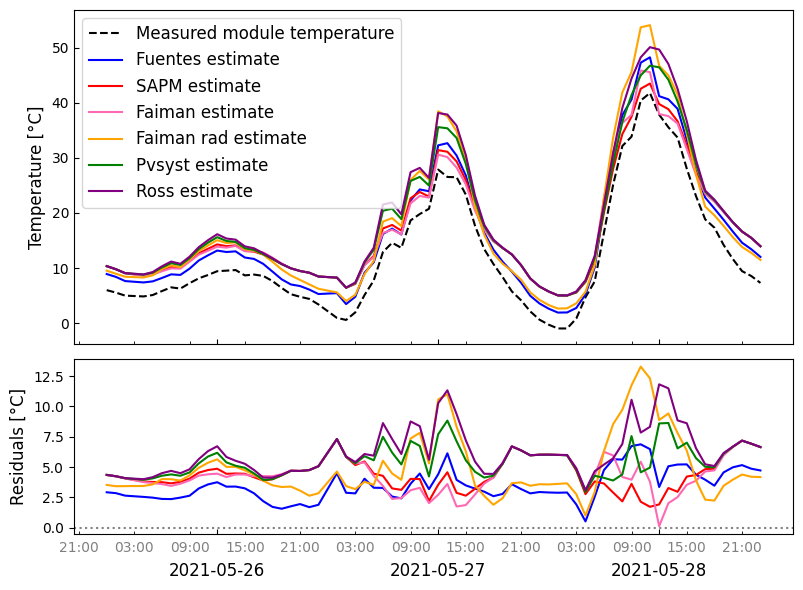

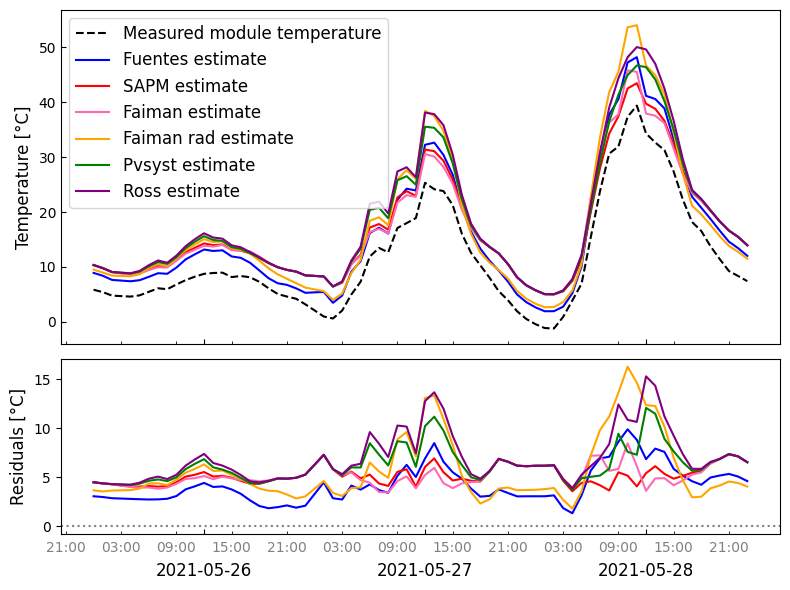

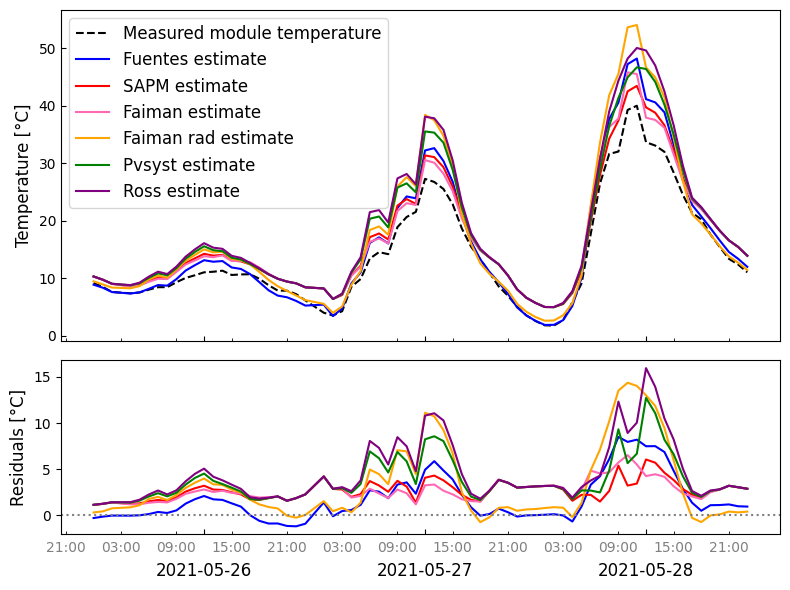

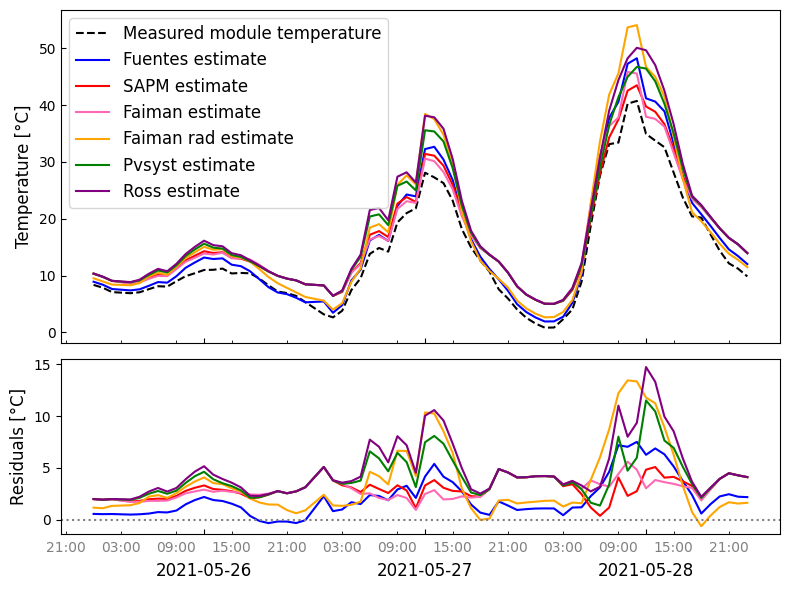

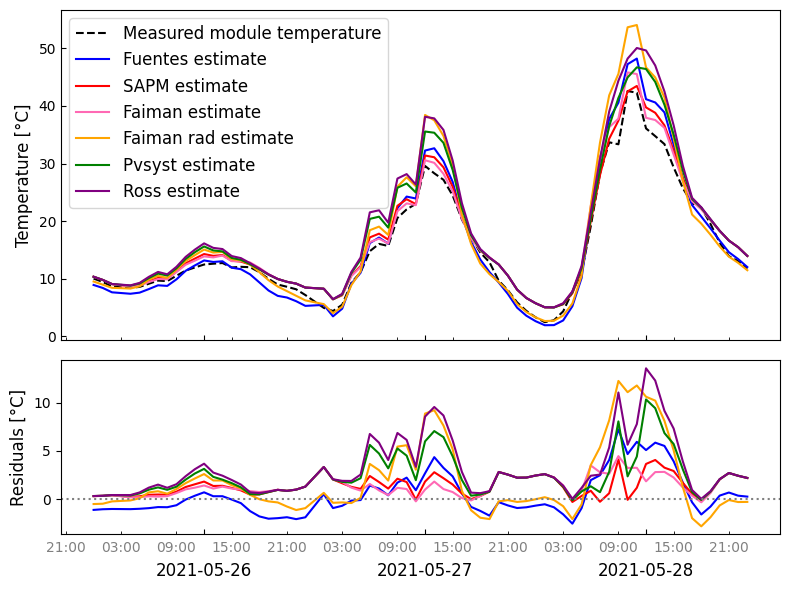

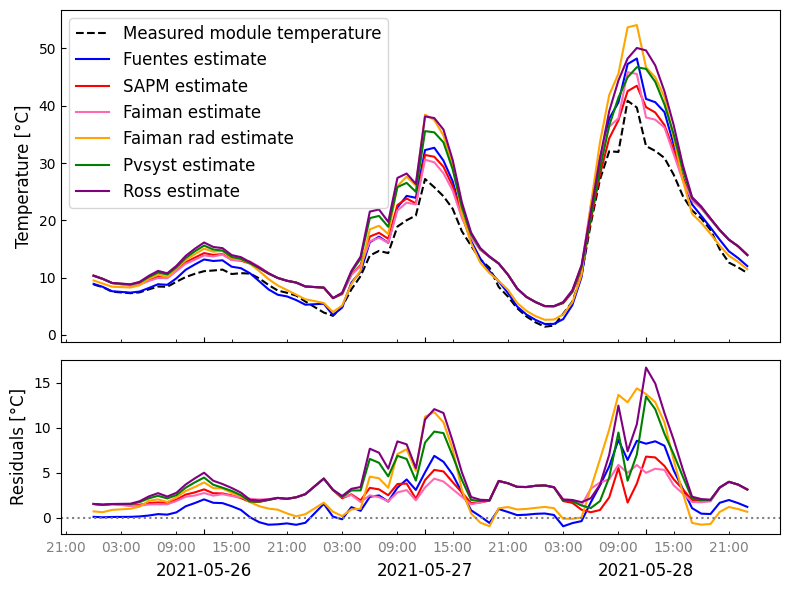

In [86]:
datea = '2021-05-26'
dateb = '2021-05-28'
models = ["Fuentes", "SAPM", "Faiman", "Faiman rad","Pvsyst", "Ross"]
colors = ["b", "r", "hotpink", "orange", "green", "purple"]
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df["PT JKM325 nr 3 [°C]"].loc[datea:dateb], "PT JKM325 nr 3")
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df["PT JKM335 nr 3 [°C]"].loc[datea:dateb], "PT JKM335 nr 3")
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df['PT SunP nr 2 [°C]'].loc[datea:dateb], "PT SunP nr 2")
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df['PT REC nr 3 [°C]'].loc[datea:dateb], "PT REC nr 3")
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df["PT Talesun FrLess 1 [°C]"].loc[datea:dateb], "PT Talesun FrLess 1")
plot_comparison(df.loc[datea:dateb].index, [ temp_fuentes1.loc[datea:dateb], temp_sapm1.loc[datea:dateb], temp_faiman1.loc[datea:dateb], temp_faimanrad1.loc[datea:dateb], temp_pvsyst1.loc[datea:dateb], temp_ross1.loc[datea:dateb]], df["PT Talesun 3 [°C]"].loc[datea:dateb], "PT Talesun 3")